<a href="https://www.kaggle.com/code/alihassanshahid/trained-nnet-on-gender-classification-using-voice?scriptVersionId=219506492" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# `Gender Classification Using Voice Features`

Author: Ali Hassan Shahid

Email: alyhassanshahid@gmail.com

Contact: [LinkedIn](https://www.linkedin.com/in/alihassanshahid17/)

# `Objective`

### `Build a machine learning model to classify a voice as male or female based on acoustic properties.`

`Steps`

* Step1: `Import libraries`

* Step2: `Load and preview the dataset`, i.e, check for missing values

* Step3: `Encode the target variables` (male = 0, female = 1)

* Step4: `Separate features and target`

* Step5: `Split dataset into training and testing sets`

* Step6: `Normalize the features` using StandardScaler

* Step7: `Build and compile` the neural network model

* Step8: `Train the model`

* Step9: `Evaluate the model` and check for accuracy 

* Step10: `Data Visualizations`

### `About Dataset`
`Gender Recognition by Voice and Speech Analysis`

This database was created to identify a voice as male or female, based upon acoustic properties of the voice and speech. The dataset consists of 3,168 recorded voice samples, collected from male and female speakers. The voice samples are pre-processed by acoustic analysis in R using the seewave and tuneR packages, with an analyzed frequency range of 0hz-280hz (human vocal range).

### `The Dataset`
The following acoustic properties of each voice are measured and included within the CSV:

* meanfreq: mean frequency (in kHz)
* sd: standard deviation of frequency
* median: median frequency (in kHz)
* Q25: first quantile (in kHz)
* Q75: third quantile (in kHz)
* IQR: interquantile range (in kHz)
* skew: skewness (see note in specprop description)
* kurt: kurtosis (see note in specprop description)
* sp.ent: spectral entropy
* sfm: spectral flatness
* mode: mode frequency
* centroid: frequency centroid (see specprop)
* peakf: peak frequency (frequency with highest energy)
* meanfun: average of fundamental frequency measured across acoustic signal
* minfun: minimum fundamental frequency measured across acoustic signal
* maxfun: maximum fundamental frequency measured across acoustic signal
* meandom: average of dominant frequency measured across acoustic signal
* mindom: minimum of dominant frequency measured across acoustic signal
* maxdom: maximum of dominant frequency measured across acoustic signal
* dfrange: range of dominant frequency measured across acoustic signal
* modindx: modulation index. Calculated as the accumulated absolute difference between adjacent measurements of fundamental frequencies divided by the frequency range
* label: male or female


`References`
* The Harvard-Haskins Database of Regularly-Timed Speech

* Telecommunications & Signal Processing Laboratory (TSP) Speech Database at McGill University, Home

* VoxForge Speech Corpus, Home

* Festvox CMU_ARCTIC Speech Database at Carnegie Mellon University

# `Implementation`

## `Step 1: Import libraries`

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

## `Step2: Load and preview the dataset`, i.e, check for missing values

In [11]:
# Load dataset
# url = "https://raw.githubusercontent.com/primaryobjects/voice-gender/master/voice.csv"  # Dataset URL
data = pd.read_csv('/kaggle/input/voicegender/voice.csv')

# Preview the dataset
print(data.head())

# Check for missing values
print('Missing Values')
print(data.isnull().sum())

   meanfreq        sd    median       Q25       Q75       IQR       skew  \
0  0.059781  0.064241  0.032027  0.015071  0.090193  0.075122  12.863462   
1  0.066009  0.067310  0.040229  0.019414  0.092666  0.073252  22.423285   
2  0.077316  0.083829  0.036718  0.008701  0.131908  0.123207  30.757155   
3  0.151228  0.072111  0.158011  0.096582  0.207955  0.111374   1.232831   
4  0.135120  0.079146  0.124656  0.078720  0.206045  0.127325   1.101174   

          kurt    sp.ent       sfm  ...  centroid   meanfun    minfun  \
0   274.402906  0.893369  0.491918  ...  0.059781  0.084279  0.015702   
1   634.613855  0.892193  0.513724  ...  0.066009  0.107937  0.015826   
2  1024.927705  0.846389  0.478905  ...  0.077316  0.098706  0.015656   
3     4.177296  0.963322  0.727232  ...  0.151228  0.088965  0.017798   
4     4.333713  0.971955  0.783568  ...  0.135120  0.106398  0.016931   

     maxfun   meandom    mindom    maxdom   dfrange   modindx  label  
0  0.275862  0.007812  0.007812  

## `Step3: Encode the target variables` (male = 0, female = 1)

In [12]:
# Encode the target variable (male = 0, female = 1)
encoder = LabelEncoder()
data['label'] = encoder.fit_transform(data['label'])


## `Step4: Separate features and target`

In [13]:
# Separate features and target
X = data.drop('label', axis=1)
y = data['label']

## `Step5: Split dataset into training and testing sets`

In [ ]:
# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

## `Step6: Normalize the features` using StandardScaler

In [14]:
# Normalize the features using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


## `Step 7: Build and compile` the neural network model

In [15]:
# Build the neural network model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),  # Dropout for regularization
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')  # Binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## `Step8: Train the model`

In [20]:
# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))


The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.
Epoch 1/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9857 - loss: 0.0332 - val_accuracy: 0.9826 - val_loss: 0.0423
Epoch 2/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9871 - loss: 0.0336 - val_accuracy: 0.9890 - val_loss: 0.0373
Epoch 3/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9882 - loss: 0.0310 - val_accuracy: 0.9874 - val_loss: 0.0411
Epoch 4/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9877 - loss: 0.0265 - val_accuracy: 0.9874 - val_loss: 0.0352
Epoch 5/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9877 - loss: 0.0264 - val_accuracy: 0.9905 - val_loss: 0.0366
Epoch 6/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9923 - loss: 0.0222 - val_accuracy: 0.9890 - val_loss: 0.0445
Epoch 7/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9924 - loss: 0.0207 - val_

## `Step9: Evaluate the model` and check for accuracy 

In [21]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


Test Accuracy: 98.42%


## `Step10: Data Visualizations`

### `Plot training and validation accuracy`

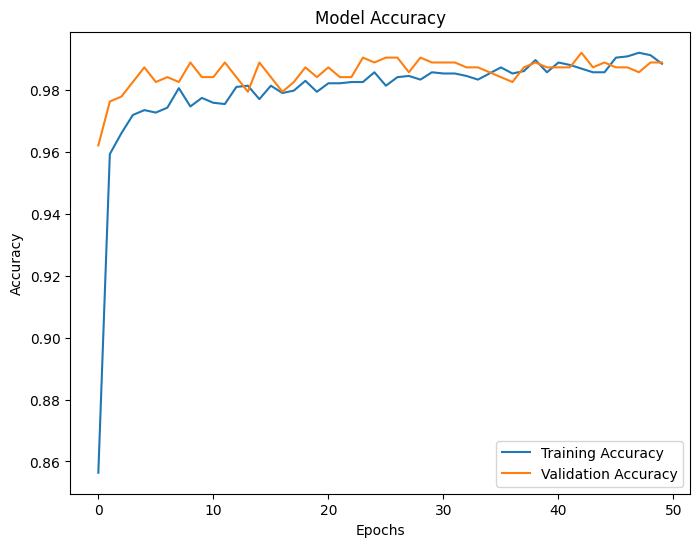

In [17]:
# Plot training and validation accuracy
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy')
plt.show()

### `Confusion Matrix`

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


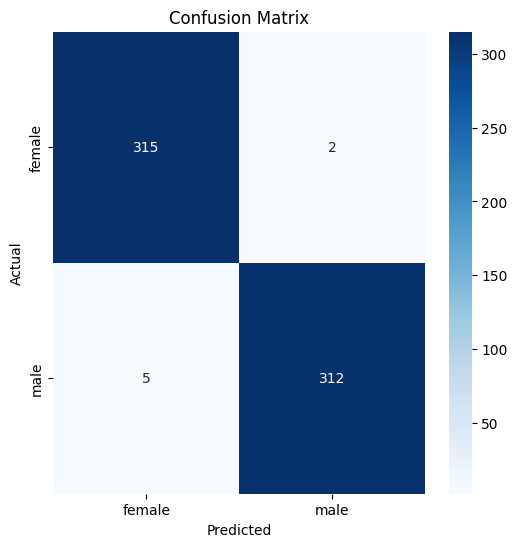

In [18]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix, classification_report

y_pred = (model.predict(X_test) > 0.5).astype("int32")
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### `classification report`

In [19]:
# Print classification report
print(classification_report(y_test, y_pred, target_names=encoder.classes_))


              precision    recall  f1-score   support

      female       0.98      0.99      0.99       317
        male       0.99      0.98      0.99       317

    accuracy                           0.99       634
   macro avg       0.99      0.99      0.99       634
weighted avg       0.99      0.99      0.99       634

